Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:

a.	Loading and preprocessing the image data

b.	Defining the model's architecture

c.	Training the model

d.	Estimating the model's performance


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist_train = pd.read_csv(r'./content/mnist_train.csv')
mnist_test  = pd.read_csv(r'./content/mnist_test.csv')

In [3]:
mnist_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = mnist_train.drop(['label'], axis=1)
y_train = mnist_train['label']

In [6]:
x_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [8]:
x_test = mnist_test.drop(['label'], axis=1)
y_test = mnist_test['label']

In [9]:
x_train = pd.DataFrame.to_numpy(x_train)
y_train = pd.DataFrame.to_numpy(y_train)



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
x_train.shape

(60000, 784)

In [13]:
y_train.shape

(60000,)

In [14]:
x_test = pd.DataFrame.to_numpy(x_test)
y_test = pd.DataFrame.to_numpy(y_test)

In [15]:
x_train = x_train.reshape(-1, 28,28)
x_test = x_test.reshape(-1, 28,28)

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
y_train.shape

(60000,)

In [18]:
print("Shape of Training: {0} and {1}".format(x_train.shape, y_train.shape))
print("Shape of test: {0} and {1}".format(x_test.shape, y_test.shape))

Shape of Training: (60000, 28, 28) and (60000,)
Shape of test: (10000, 28, 28) and (10000,)


In [19]:
x_train= x_train/255.0
x_test = x_test/255.0

In [20]:
# adding channel dimension to hold grayscale value
x_train = x_train.reshape(-1, 28, 28, 1 )
x_test = x_test.reshape(-1, 28,28,1)

In [21]:
print("Shape of Training: {0} and {1}".format(x_train.shape, y_train.shape))
print("Shape of test: {0} and {1}".format(x_test.shape, y_test.shape))

Shape of Training: (60000, 28, 28, 1) and (60000,)
Shape of test: (10000, 28, 28, 1) and (10000,)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical

In [23]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [25]:
y_train.shape

(60000, 10)

In [26]:
print("Shape of Training: {0} and {1}".format(x_train.shape, y_train.shape))
print("Shape of test: {0} and {1}".format(x_test.shape, y_test.shape))

Shape of Training: (60000, 28, 28, 1) and (60000, 10)
Shape of test: (10000, 28, 28, 1) and (10000, 10)


In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', strides=1))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', strides=1))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.1))
model.add(Flatten())
#no. of nodes in Dense after Flatten doesn't need to match the output of Flatten
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Batch size impacts learning significantly. What happens when you put a batch through your network is that you average the gradients. The concept is that if your batch size is big enough, this will provide a stable enough estimate of what the gradient of the full dataset would be. By taking samples from your dataset, you estimate the gradient while reducing computational cost significantly. The lower you go, the less accurate your esttimate will be, however in some cases these noisy gradients can actually help escape local minima. When it is too low, your network weights can just jump around if your data is noisy and it might be unable to learn or it converges very slowly, thus negatively impacting total computation time.

Another advantage of batching is for GPU computation, GPUs are very good at parallelizing the calculations that happen in neural networks if part of the computation is the same (for example, repeated matrix multiplication over the same weight matrix of your network). This means that a batch size of 16 will take less than twice the amount of a batch size of 8.

In the case that you do need bigger batch sizes but it will not fit on your GPU, you can feed a small batch, save the gradient estimates and feed one or more batches, and then do a weight update. This way you get a more stable gradient because you increased your virtual batch size.

In [29]:
h = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 9ms/step - loss: 0.1273 - accuracy: 0.9603 - val_loss: 0.0407 - val_accuracy: 0.9872
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0333 - val_accuracy: 0.9896
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0285 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0342 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0282 - val_accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0314 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0296 - val_ac

In [30]:
print('Model Accuracy = ', model.evaluate(x_test, y_test)[1]*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9906
Model Accuracy =  99.05999898910522


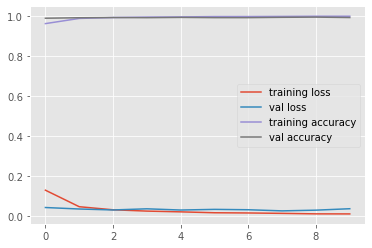

In [31]:
plt.style.use('ggplot')
xaxis = np.arange(0,10)
plt.plot(xaxis, h.history['loss'], label='training loss')
plt.plot(xaxis, h.history['val_loss'], label='val loss')
plt.plot(xaxis, h.history['accuracy'], label='training accuracy')
plt.plot(xaxis, h.history['val_accuracy'], label='val accuracy')
plt.legend()
